In [26]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

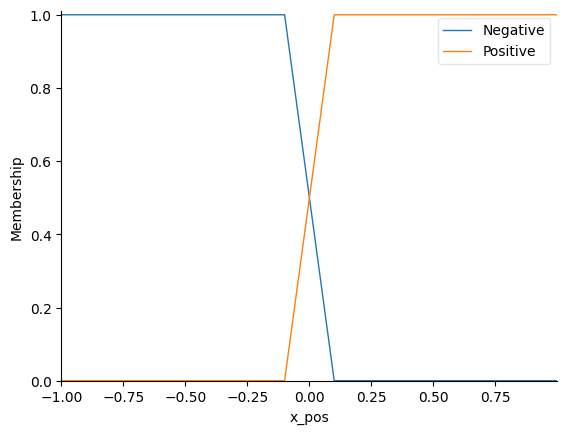

In [27]:
x_pos= ctrl.Antecedent(np.arange(-1.0, 1.0, 0.001), 'x_pos') 

x_pos['Negative'] = fuzz.trapmf(x_pos.universe, [-1.0, -1.0, -0.1, 0.1]) 
x_pos['Positive'] = fuzz.trapmf(x_pos.universe, [-0.1, 0.1, 1.0, 1.0])

x_pos.view()

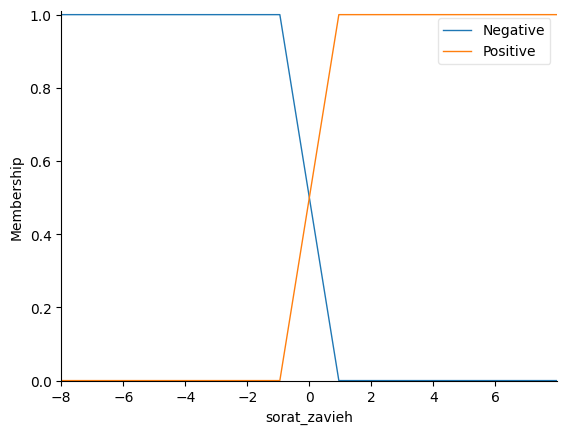

In [28]:
sorat_zavieh = ctrl.Antecedent(np.arange(-8.0, 8.0, 0.001), 'sorat_zavieh')

sorat_zavieh['Negative'] = fuzz.trapmf(sorat_zavieh.universe, [-8.0, -8.0, -0.95, 0.95])
sorat_zavieh['Positive'] = fuzz.trapmf(sorat_zavieh.universe, [-0.95, 0.95, 8.0, 8.0])

sorat_zavieh.view()

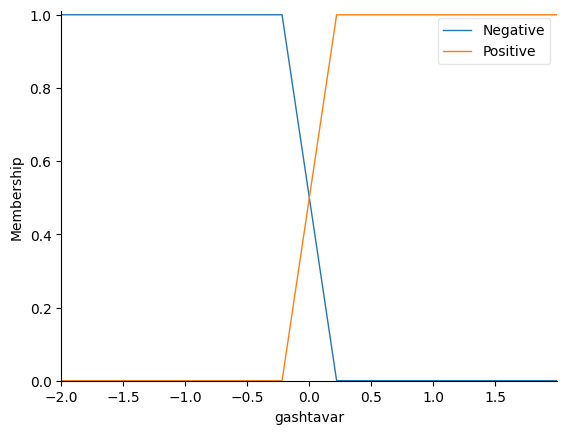

In [29]:
gashtavar = ctrl.Consequent(np.arange(-2.0, 2.0, 0.001), 'gashtavar')

gashtavar['Negative'] = fuzz.trapmf(gashtavar.universe, [-2.0, -2.0, -0.22, 0.22])
gashtavar['Positive'] = fuzz.trapmf(gashtavar.universe, [-0.22, 0.22, 2.0, 2.0])

gashtavar.view()

In [30]:
rules = [
    ctrl.Rule(x_pos['Positive'] & sorat_zavieh['Positive'], gashtavar['Negative']),
    ctrl.Rule(x_pos['Positive'] & sorat_zavieh['Negative'], gashtavar['Positive']),
    ctrl.Rule(x_pos['Negative'] & sorat_zavieh['Negative'], gashtavar['Negative']),
    ctrl.Rule(x_pos['Negative'] & sorat_zavieh['Positive'], gashtavar['Positive']),
]

In [31]:
control_system = ctrl.ControlSystem(rules)
simulation = ctrl.ControlSystemSimulation(control_system)

In [32]:
env = gym.make('Pendulum-v1', render_mode="human")
rewards = []
observation, _ = env.reset()

for i in range(500):
    simulation.input['x_pos'] = observation[0]
    simulation.input['sorat_zavieh'] = observation[2]
    simulation.compute()
    total_value = simulation.output['gashtavar']
    
    
    observation, reward, terminated, truncated, info = env.step([total_value])
    env.render()
    rewards.append(reward)

    if terminated:
        print(f'You Won in {i} iterations!!!')
        break

    if observation[0] > 0.99 and abs(observation[2]) < 1.5:
        print(f'You Won in {i} iterations!!!')
        break

env.close()

You Won in 129 iterations!!!


## Visualize the rewards

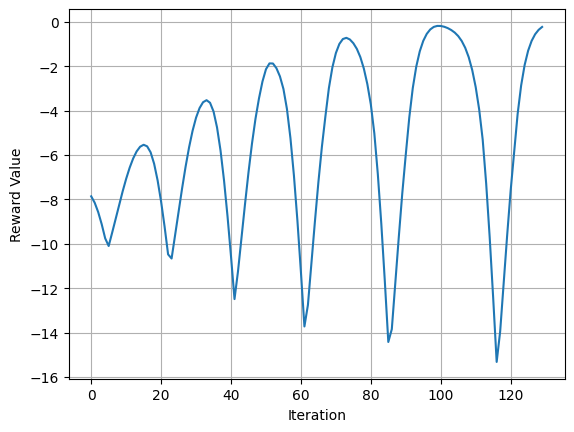

In [35]:
plt.plot(rewards)
plt.xlabel('ITRATION')
plt.ylabel('REWARDS')
plt.grid(True)
plt.show()